In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Dataset

df = pd.read_csv("train.csv")  # Loading the dataset from the same destination as the notebook

In [3]:
df.info()  # Getting non-null count and type of each column of the dataset

# We see that many columns have a significant no. null values
# However in some cases these nulls are the result of a property not having that feature so are not errors in the data
# Will likely need convert these to an 'NA' for categorical variables or '0' for numerical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()  # getting numerical information for all quantitative columns of the dataset

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


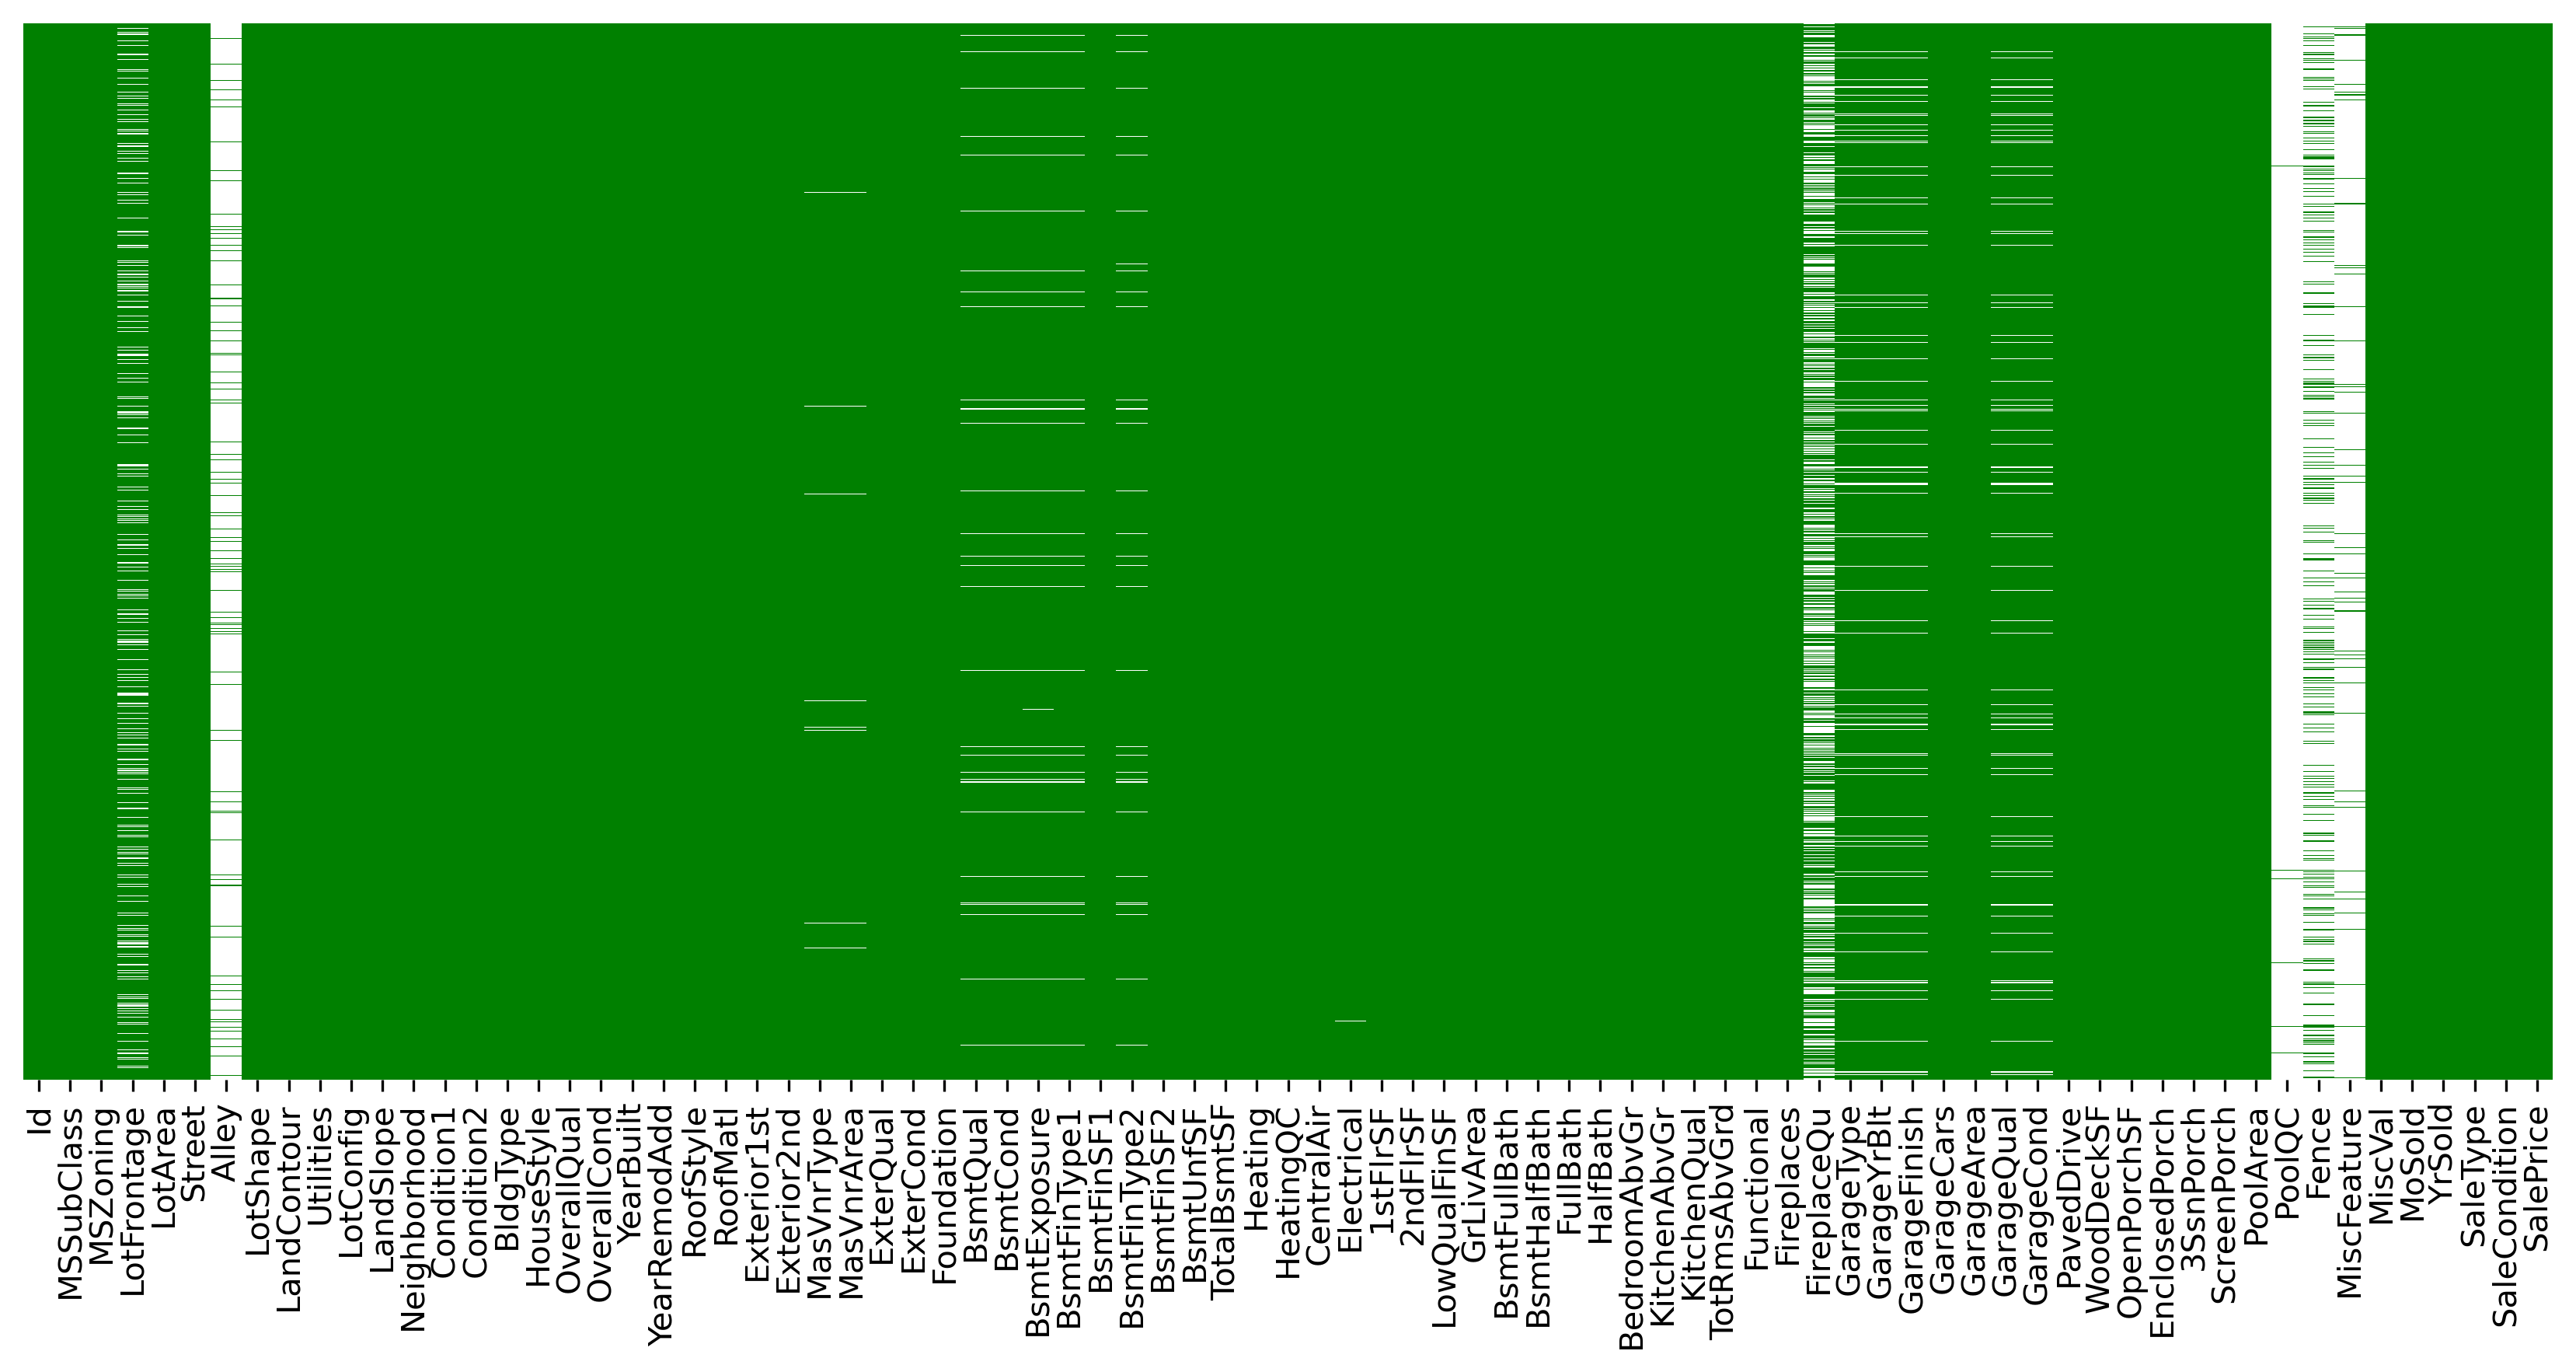

In [5]:
# This plots a heatmap coloured by whether each row in each column is null

plt.figure(figsize = (14, 6), dpi = 300)
sns.heatmap(df.isnull(), yticklabels = False, xticklabels = df.columns.values.tolist(), cbar = False, cmap='ocean')
plt.show()

<BarContainer object of 4 artists>

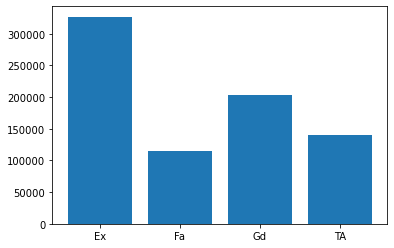

In [6]:
# Plotting mean sale price by basement quality, see we don't get plot for NA so confirms need to convert NAs to values for such categorical fields with nulls
Price_Grouped = df.groupby('BsmtQual')['SalePrice'].mean()
plt.bar(x = np.arange(0, len(Price_Grouped), 1), height = Price_Grouped, tick_label = Price_Grouped.index.values.tolist())


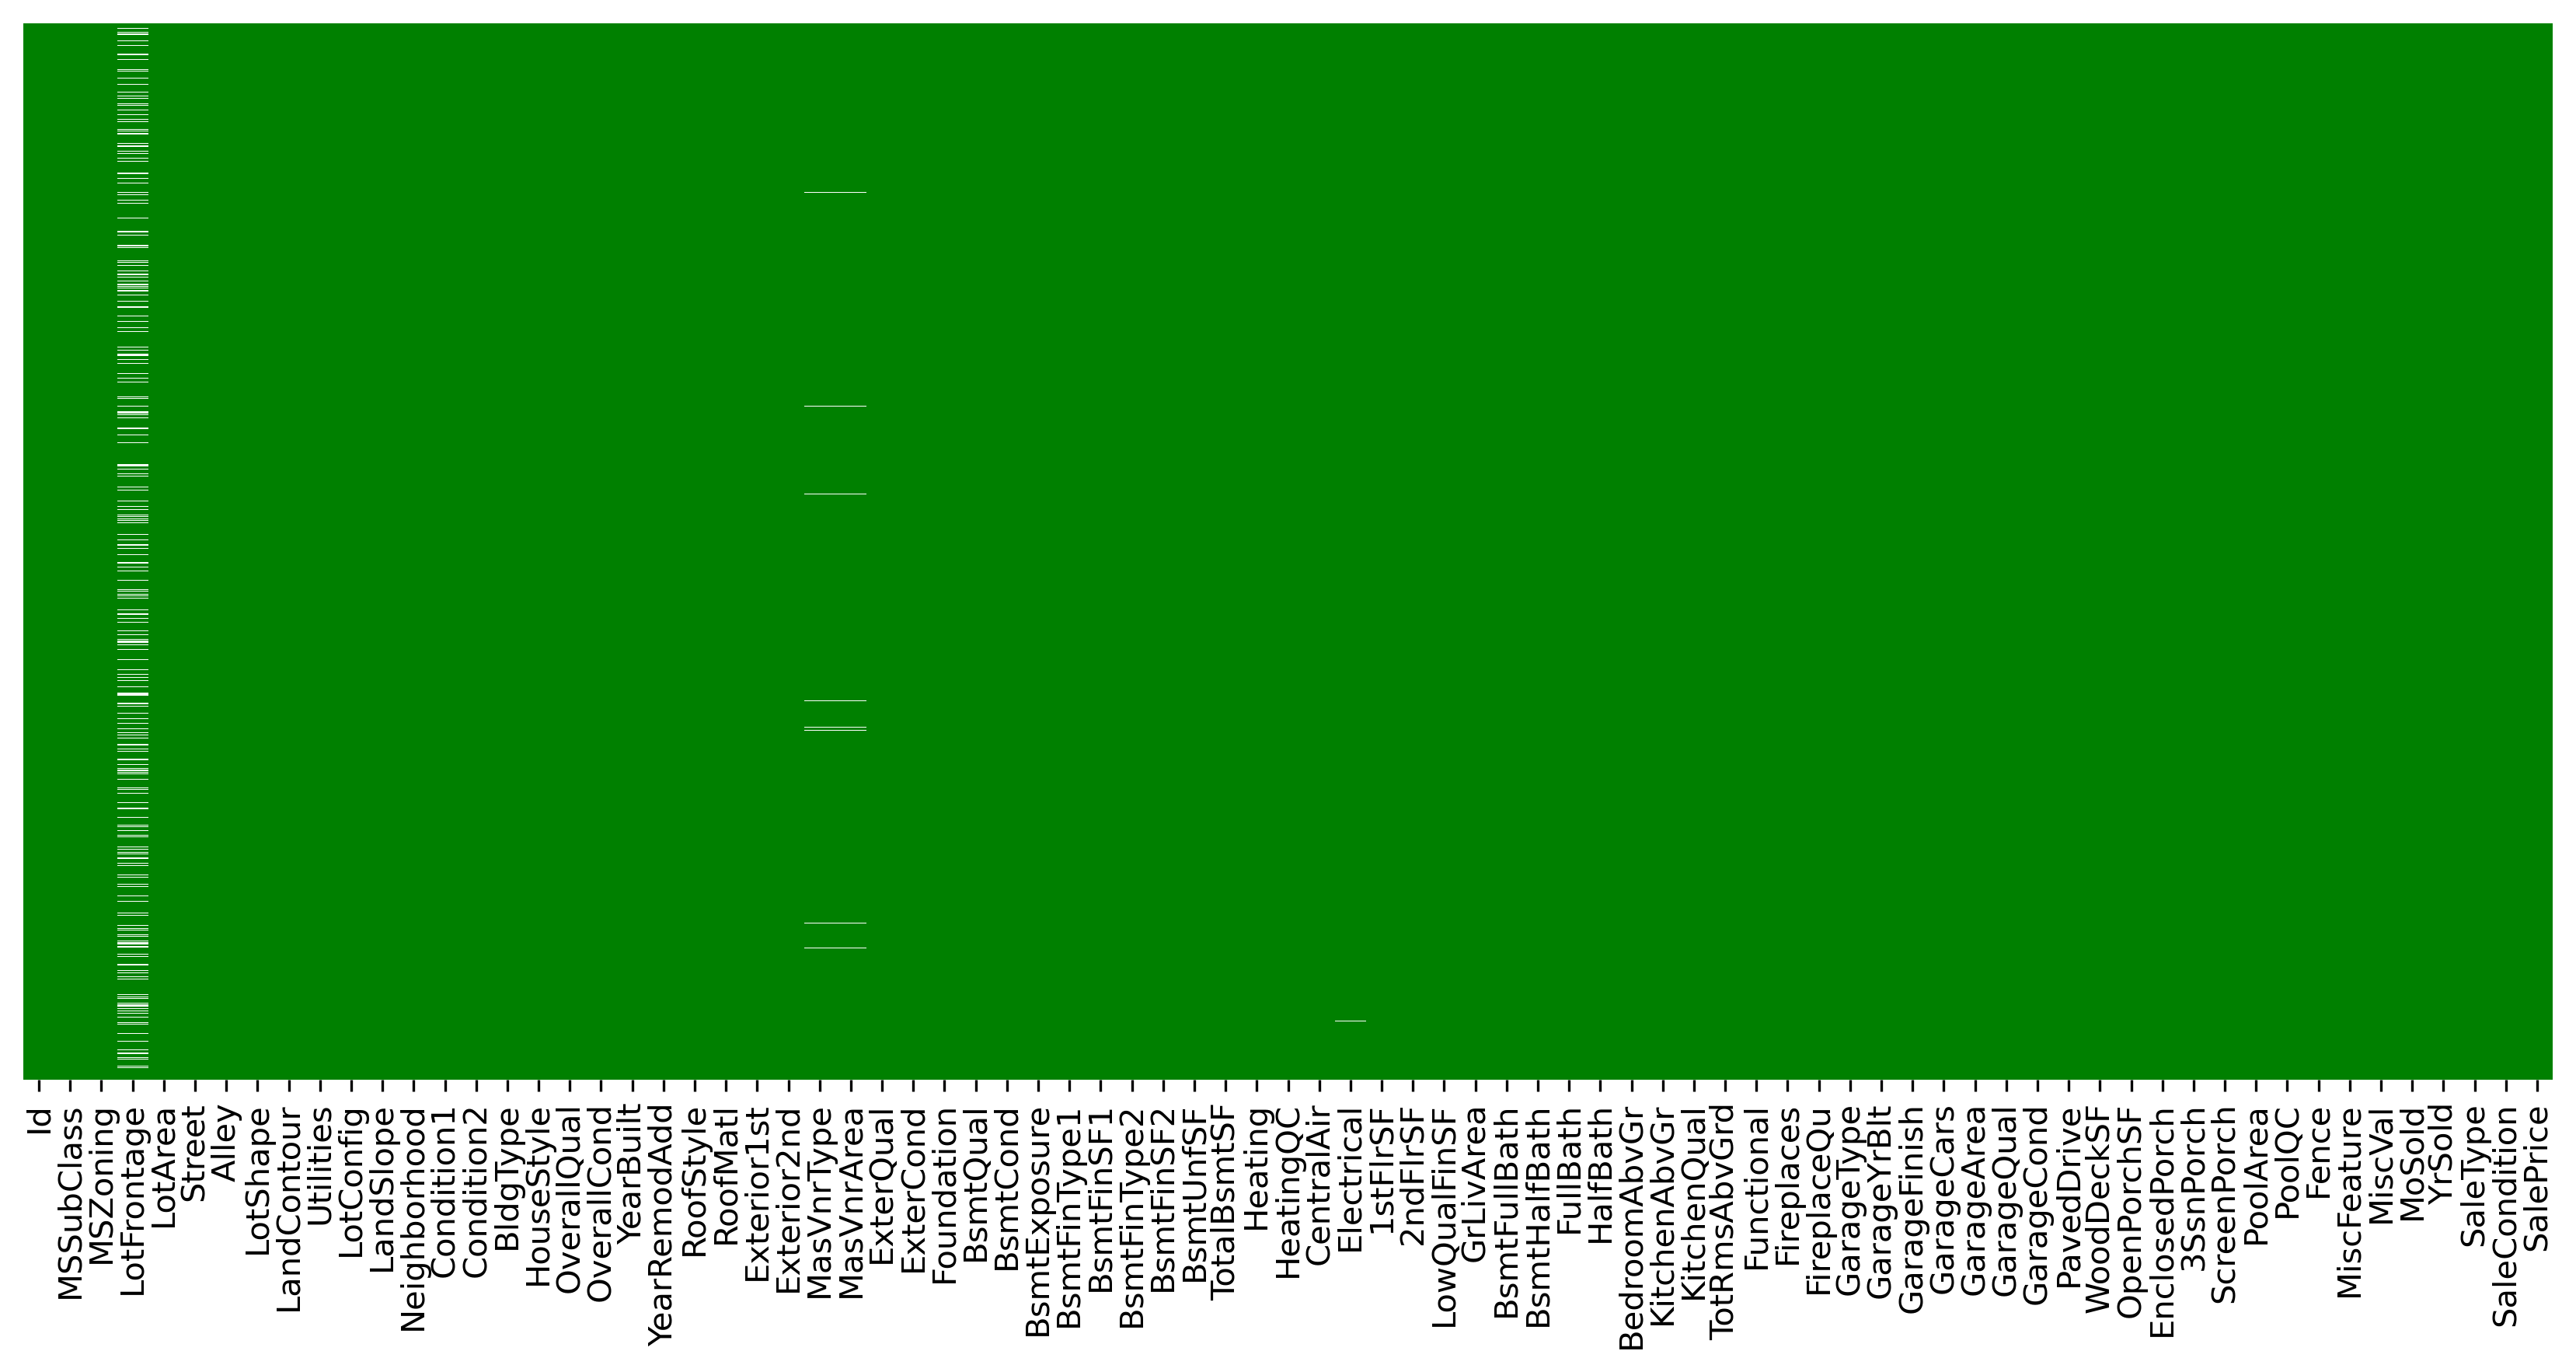

In [7]:
# Columns to convert nulls to 'NA' categories so can be visualised
NA_Columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
              'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

df[NA_Columns] = df[NA_Columns].fillna("NA")

plt.figure(figsize = (14, 6), dpi = 300)
sns.heatmap(df.isnull(), yticklabels = False, xticklabels = df.columns.values.tolist(), cbar = False, cmap='ocean')
plt.show()


In [8]:
# Counting building type for where lot frontage null
df[df['LotFrontage'].isnull()].fillna(0).groupby('BldgType')['LotFrontage'].count()

# Looking at properties with nulls for lot frontage not a case where it is properties such as flats ("duplex") where property
# wouldn't be connected to a road, in fact mainly single family detached properties but not exclusively
# Therefore not sure nulls if not genuine missing data and because purpose is to visualise and analyse data there is no need
# to use any null filling method if not certain what these values should be

BldgType
1Fam      226
2fmCon      3
Duplex      5
Twnhs       3
TwnhsE     22
Name: LotFrontage, dtype: int64

In [9]:
# YearRemod supposed to be same as year built if not remodelled however for houses built pre 1950 YearRemod is 1950 at
# earliest hence decided to change YearRemod to year built as should be if not remodelled
# However assuming here no remodelling prior to 1950 on these older houses so not perfect but better assumption than all
# remodelled in 1950

# Changing pre 1950 built houses with no post 1950 remodelling to have same year as year built for when remodelled
df.loc[((df['YearBuilt'] < 1950) & (df['YearRemodAdd'] == 1950)),'YearRemodAdd'] = df['YearBuilt']
df.loc[df['YearBuilt'] <= 1950][['YearBuilt', 'YearRemodAdd']]

,YearBuilt,YearRemodAdd
3,1915,1970
8,1931,1931
9,1939,1939
15,1929,2001
21,1930,1930
...,...,...
1440,1922,1994
1443,1916,1916
1448,1910,2000
1457,1941,2006


In [10]:
# Filtering to look at only normal sales on residential properties that are in a good condition

# Filterting to only include residential properties
MSZoning_Filter =  ['RL', 'RM', 'FV', 'RH']
df = df[df['MSZoning'].isin(MSZoning_Filter)]

# Filtering to only include normal sales
df = df[df['SaleCondition'] == 'Normal']

# Filterting to only include non-damaged houses - ones with "typcial functionality"
df = df[df['Functional'] == 'Typ']

len(df)

1104

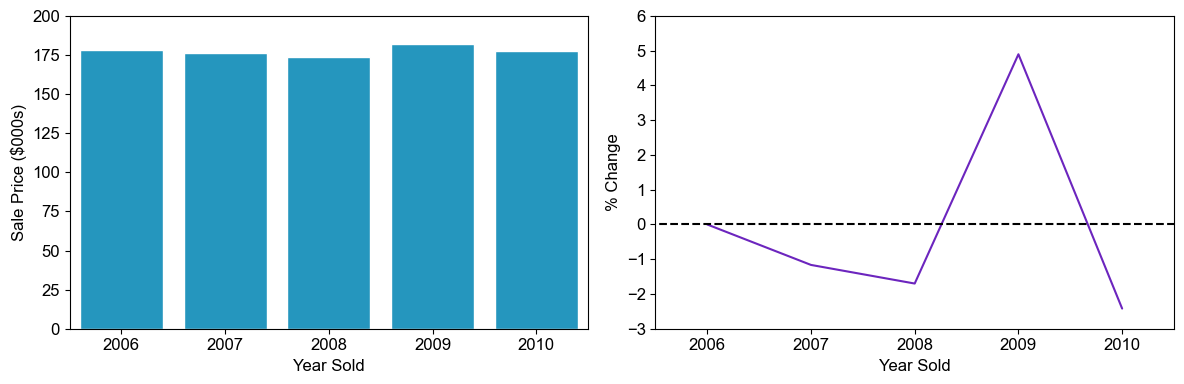

YrSold
2006    178.543967
2007    176.465916
2008    173.466598
2009    181.964884
2010    177.561736
Name: SalePrice, dtype: float64
[0.0, -1.1638875526361003, -1.6996585943592546, 4.899091080587614, -2.419779220416851]


In [11]:
plt.rcParams.update({'font.size': 12})

# Calculating yearly average and percentage change by year
Price_Grouped_Year = df.groupby('YrSold')['SalePrice'].mean()
Price_Yearly_Change = Price_Grouped_Year.pct_change()*100
Price_Yearly_Change[2006] = 0
Price_Yearly_Change_List = Price_Yearly_Change.values.tolist()
Year_List = Price_Grouped_Year.index.values.tolist()


fig, ax  = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4), dpi = 100)

# Plotting mean sale price
sns.set_style("darkgrid")
ax[0].bar(x = np.arange(min(Year_List), max(Year_List) + 1, 1),
       height = Price_Grouped_Year/1000, 
       tick_label = Year_List,
       color = '#2596be')
ax[0].set_xlabel("Year Sold", fontsize = 12)
ax[0].set_xlim((2005.5, 2010.5))
ax[0].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[0].set_ylim((0, 200))

# Plotting change by year
ax[1].plot(Year_List, Price_Yearly_Change_List, color = '#6c25be')
ax[1].plot([2005, 2011], [0,0], linestyle = '--', color = 'black')
ax[1].set_ylabel('% Change', fontsize = 12)
ax[1].set_ylim((-3, 6))
ax[1].set_xlim((2005.5, 2010.5))
ax[1].set_xticks(Year_List)
ax[1].set_xlabel("Year Sold", fontsize = 12)

plt.tight_layout()

plt.show()

# Printing the plotted values
print(Price_Grouped_Year/1000)
print(Price_Yearly_Change_List)

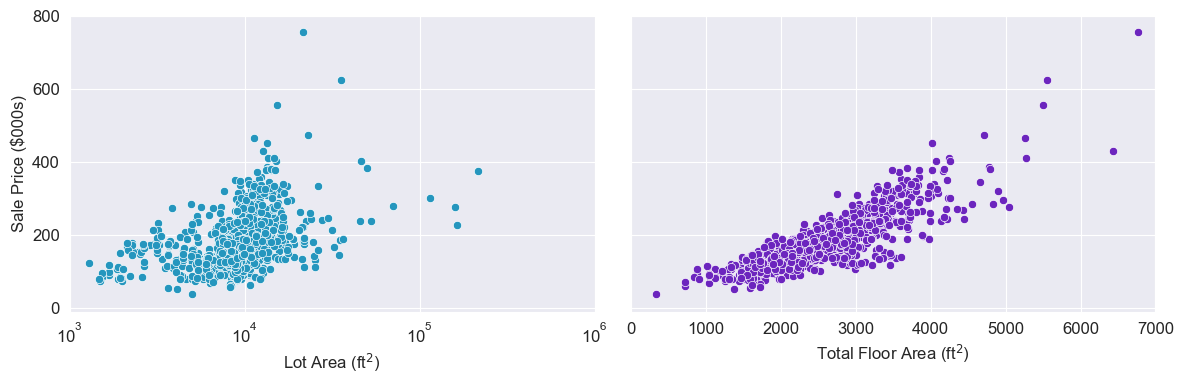

Sale Price - Lot Area correlation: 0.28336713303963557
Sale Price - Total Floor Area correlation: 0.854075384317048


In [12]:
# Making new area for total floor area as sum of above ground floor area and basement size
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

fig, ax  = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4), dpi = 100, sharey = True)

# Plotting lot area vs. sale price
sns.scatterplot(ax = ax[0],
                x = df['LotArea'],
                y = df['SalePrice']/1000,
                color = '#2596be')  
ax[0].set_xlabel("Lot Area (ft$^2$)", fontsize = 12)
ax[0].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[0].set_ylim((-10, 800))
ax[0].set_xlim((1e3, 1e6))
ax[0].set_xscale('log')  # use log scale as big range in lot area that has uneven spread

# See some weak correlation

# Plotting Floor space vs. sales price
sns.scatterplot(ax = ax[1],
                x = df['TotalArea'],
                y = df['SalePrice']/1000,
                color = '#6c25be')
ax[1].set_xlabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[1].set_ylim((-10, 800))
ax[1].set_xlim((0, 7000))
ax[1].set_xticks(np.arange(0, 8000, 1000))

plt.tight_layout()

plt.show()

# Pearson correlation coefficient between total area and sale price
Price_Area_corr = df['SalePrice'].corr(df['TotalArea'])
Price_LotArea_corr = df['SalePrice'].corr(df['LotArea'])

print('Sale Price - Lot Area correlation: ' + str(Price_LotArea_corr))
print('Sale Price - Total Floor Area correlation: ' + str(Price_Area_corr))

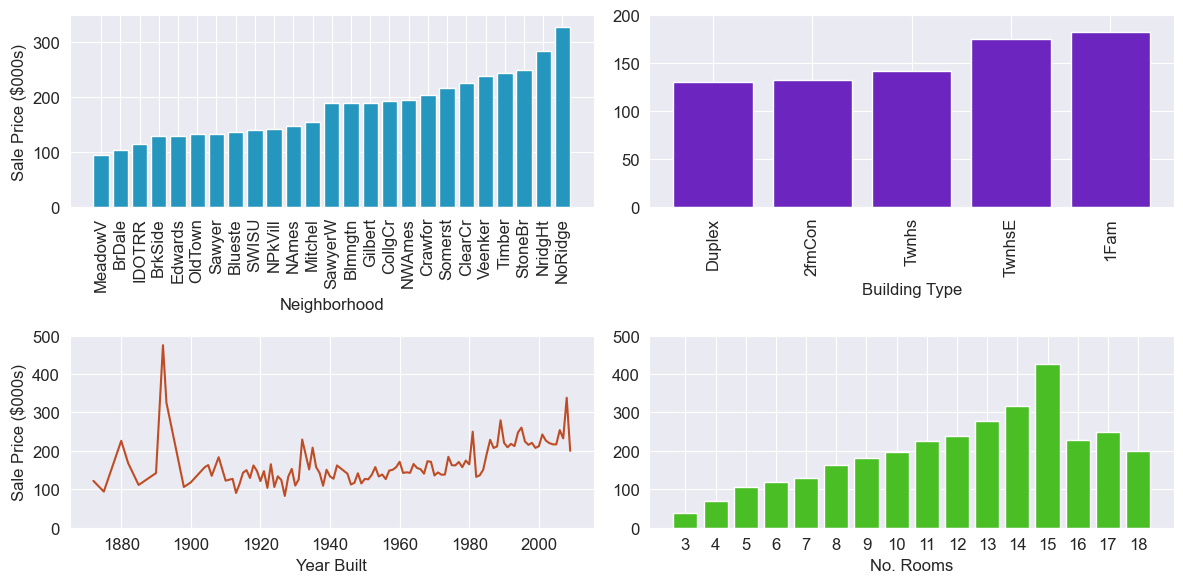

BldgType
Duplex    130368.472222
2fmCon    132239.130435
Twnhs     141332.352941
TwnhsE    174595.058824
1Fam      182196.470842
Name: SalePrice, dtype: float64
Neighborhood
MeadowV     95.493333
BrDale     104.750000
IDOTRR     114.588000
BrkSide    129.630729
Edwards    130.061594
OldTown    132.707696
Sawyer     133.875589
Blueste    137.500000
SWISU      139.807895
NPkVill    143.031250
NAmes      148.319514
Mitchel    155.903846
SawyerW    188.952653
Blmngtn    188.977083
Gilbert    189.392812
CollgCr    193.877225
NWAmes     194.379250
Crawfor    203.578425
Somerst    217.760653
ClearCr    226.836842
Veenker    238.772727
Timber     243.598577
StoneBr    249.459000
NridgHt    285.046667
NoRidge    328.219135
Name: SalePrice, dtype: float64
TotalRooms
3      39.300000
4      70.250000
5     107.056000
6     119.638432
7     130.356094
8     162.526005
9     181.667283
10    197.614265
11    224.802020
12    238.031857
13    278.877429
14    316.502143
15    424.842857
16    228.93

In [13]:
# Plotting mean sale price by other categorical factors

# Mean price by neighbourhood
Price_Grouped_Neighborhood = df.groupby('Neighborhood')['SalePrice'].mean().sort_values()
Neighborhood_List = Price_Grouped_Neighborhood.index.values.tolist()

# Mean price by building type
Price_Grouped_BldgType = df.groupby('BldgType')['SalePrice'].mean().sort_values()
BldgType_List = Price_Grouped_BldgType.index.values.tolist()

# Mean price by year built
Price_Grouped_YearBuilt = df.groupby('YearBuilt')['SalePrice'].mean()
YearBuilt_List = Price_Grouped_YearBuilt.index.values.tolist()

# Calculating total no. rooms, bathrooms not counted and calculating mean sale price
df['TotalRooms'] = df['TotRmsAbvGrd'] + df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']
Price_Grouped_TotalRooms = df.groupby('TotalRooms')['SalePrice'].mean()
TotalRooms_List = Price_Grouped_TotalRooms.index.values.tolist()


fig, ax  = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 6) , dpi = 100)

# Plotting Neighbourhood vs. sale price
ax[0,0].bar(x = np.arange(1, len(Neighborhood_List) + 1, 1),
            height = Price_Grouped_Neighborhood/1000, 
            tick_label = Neighborhood_List,
            color = '#2596be') 
ax[0,0].set_xlabel("Neighborhood", fontsize = 12)
ax[0,0].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[0,0].set_xticklabels(Neighborhood_List, rotation = 90)
ax[0,0].set_ylim((0, 350))

# Plotting Building Type vs. sale price
ax[0,1].bar(x = np.arange(1, len(BldgType_List) + 1, 1),
          height = Price_Grouped_BldgType/1000, 
          tick_label = BldgType_List,
          color = '#6c25be') 
ax[0,1].set_xlabel("Building Type", fontsize = 12)
ax[0,1].set_xticklabels(BldgType_List, rotation = 90)
ax[0,1].set_ylim((0, 200))

# Plotting Year Built vs. sale price
ax[1,0].plot(YearBuilt_List, Price_Grouped_YearBuilt/1000, color = '#be4d25') 
ax[1,0].set_xlabel("Year Built", fontsize = 12)
ax[1,0].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[1,0].set_ylim((0, 500))
# After 1950 see an increase with time, before that less clear

# Plotting No. rooms vs. sale price
ax[1,1].bar(x = np.arange(1, len(TotalRooms_List) + 1, 1),
          height = Price_Grouped_TotalRooms/1000, 
          tick_label = TotalRooms_List,
          color = '#49be25') 
ax[1,1].set_xlabel("No. Rooms", fontsize = 12)
ax[1,1].set_ylim((0, 500))
# See very strong correlation up until 16 rooms

plt.tight_layout()

plt.show()

# Printing mean values for all variables but year built (too many)
print(Price_Grouped_BldgType)
print(Price_Grouped_Neighborhood/1000)
print(Price_Grouped_TotalRooms/1000)

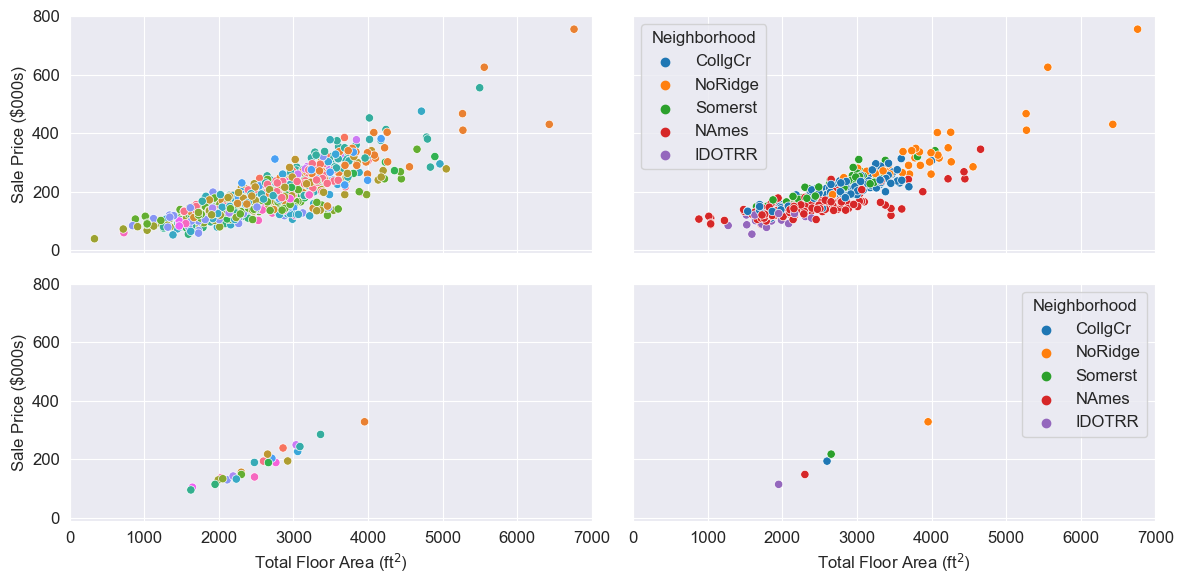

In [14]:
# Plotting Floor Area against Sale Price and colouring by neighborhood

#Taking selection of neighborhoods with different average Sale price and sufficient occurrences
# Want NoRidge, IDOTRR, NAmes, CollgCR, Somerst
Neighborhood_Filter = ['NoRidge', 'IDOTRR', 'NAmes', 'CollgCr', 'Somerst']
df_Neighborhood_Filtered = df[df['Neighborhood'].isin(Neighborhood_Filter)]

# Calculating mean area and sale price by neighborhood for filtered neighborhoods
FloorArea_Grouped_Neighborhood_filtered = df_Neighborhood_Filtered.groupby('Neighborhood')['TotalArea'].mean().sort_index()
SalePrice_Grouped_Neighborhood_filtered = df_Neighborhood_Filtered.groupby('Neighborhood')['SalePrice'].mean().sort_index()

# Calculating mean area for all neighborhoods
FloorArea_Grouped_Neighborhood = df.groupby('Neighborhood')['TotalArea'].mean().sort_index()

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 6), dpi = 100, sharey = True, sharex = True)

# Plotting all points
sns.scatterplot(ax = ax[0,0], x = df['TotalArea'], y = df['SalePrice']/1000, hue = df['Neighborhood'], legend = False,
               hue_order = df['Neighborhood'].unique()
               )
ax[0,0].set_xlabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[0,0].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[0,0].set_ylim((-10, 800))
ax[0,0].set_xlim((0, 7000))
ax[0,0].set_xticks(np.arange(0, 8000, 1000))

# Plotting means for all neighbourhoods
sns.scatterplot(ax = ax[1,0],
                x = FloorArea_Grouped_Neighborhood,
                y = Price_Grouped_Neighborhood.sort_index()/1000, 
                hue = FloorArea_Grouped_Neighborhood.index,
                hue_order = df['Neighborhood'].unique(),
                legend = False)
ax[1,0].set_xlabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[1,0].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[1,0].set_ylim((-10, 800))
ax[1,0].set_xlim((0, 7000))
ax[1,0].set_xticks(np.arange(0, 8000, 1000))

# Too much info so we filter to a sample of neighborhoods
sns.scatterplot(ax = ax[0,1],
                x = df_Neighborhood_Filtered['TotalArea'], 
                y = df_Neighborhood_Filtered['SalePrice']/1000, 
                hue = df_Neighborhood_Filtered['Neighborhood'],
                legend = True)
ax[0,1].set_xlabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[0,1].set_ylim((-10, 800))
ax[0,1].set_xlim((0, 7000))
ax[0,1].set_xticks(np.arange(0, 8000, 1000))
ax[0,1].set_ylabel(None)

# Plotting means of sale price and floor area for each of the sampled neighborhoods
sns.scatterplot(ax = ax[1,1],
                x = FloorArea_Grouped_Neighborhood_filtered,
                y = SalePrice_Grouped_Neighborhood_filtered/1000,
                hue = FloorArea_Grouped_Neighborhood_filtered.index,
                hue_order = ['CollgCr', 'NoRidge', 'Somerst', 'NAmes', 'IDOTRR'])
ax[1,1].set_xlabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[1,1].set_ylim((-10, 800))
ax[1,1].set_xlim((0, 7000))
ax[1,1].set_xticks(np.arange(0, 8000, 1000))
ax[1,1].set_ylabel(None)

plt.tight_layout()

plt.show()

# See that our most valuable neighborhoods behave as expected with total area increasing
# However NAmes consistently lower than othrs of similar size

In [15]:
# Getting correlation coefficient of mean floor area and sle price - sort by index so match
import scipy.stats
print(scipy.stats.pearsonr(FloorArea_Grouped_Neighborhood.sort_index(),Price_Grouped_Neighborhood.sort_index()))

(0.9677593938990209, 2.8624293598155343e-15)


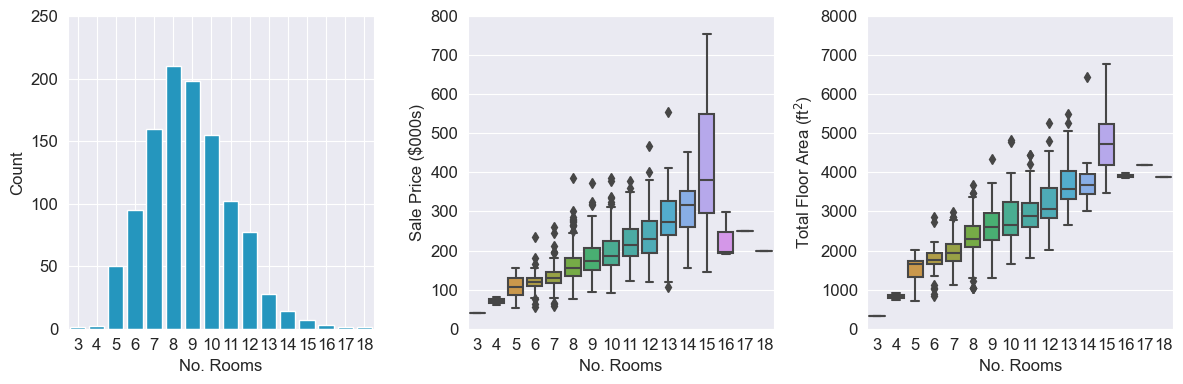

Sale Price - Total Rooms correlation: 0.6663837793714155
Floor Area - Total Rooms correlation: 0.7440686192861127


In [16]:
# Want to explore rooms are, why decrease after 15 and how correlated to total area

Rooms_Counts = df['TotalRooms'].value_counts().sort_index()  # Counting occurences of each room and sorting by no. rooms

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4), dpi = 100, sharey = False, sharex = False)

# Plotting counts of no. rooms to see distribution
ax[0].bar(x = np.arange(1, len(Rooms_Counts) + 1, 1),
          height = Rooms_Counts, 
          tick_label = Rooms_Counts.index,
          color = '#2596be') 
ax[0].set_xlabel("No. Rooms", fontsize = 12)
ax[0].set_ylabel("Count", fontsize = 12)
ax[0].set_ylim((0, 250))
ax[0].set_xlim((0.5, 16.5))

# Plotting boxplot of total rooms versus price see distributions and explain why decrease after 15 rooms
sns.boxplot(ax = ax[1], x = df['TotalRooms'], y = df['SalePrice']/1000)
ax[1].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[1].set_xlabel("No. Rooms", fontsize = 12)
ax[1].set_ylim((0, 800))

# boxplot plot of rooms vs area to see if trend similiar
sns.boxplot(ax = ax[2], x = df['TotalRooms'], y = df['TotalArea'])
ax[2].set_ylabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[2].set_xlabel("No. Rooms", fontsize = 12)
ax[2].set_ylim((0, 8000))

plt.tight_layout()

plt.show()


Price_Rooms_corr = df['SalePrice'].corr(df['TotalRooms'])
Area_Rooms_corr = df['TotalArea'].corr(df['TotalRooms'])

print('Sale Price - Total Rooms correlation: ' + str(Price_Rooms_corr))
print('Floor Area - Total Rooms correlation: ' + str(Area_Rooms_corr))

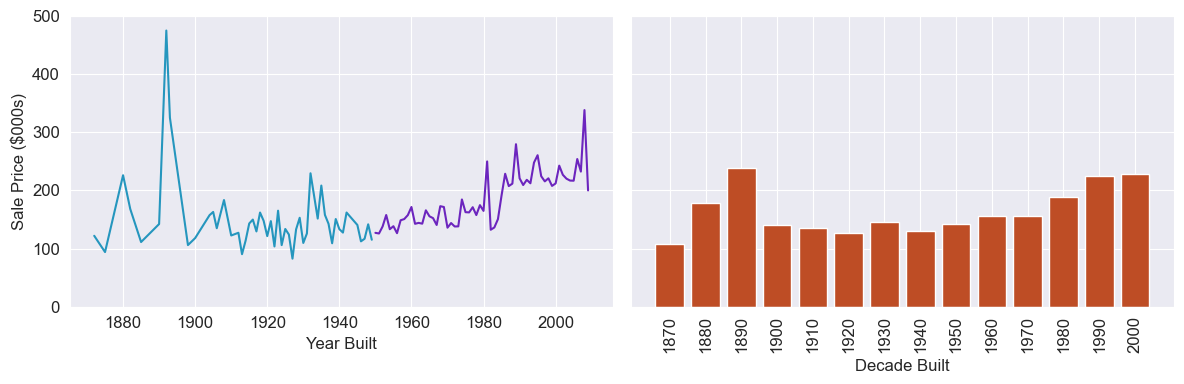

0.5278393173607253
-0.12697224748799787
DecadeBuilt
1870    108.000000
1880    178.163167
1890    238.080000
1900    141.265000
1910    134.804256
1920    127.636184
1930    145.382143
1940    129.677586
1950    142.203881
1960    155.745021
1970    155.182993
1980    188.582692
1990    225.287669
2000    228.922040
Name: SalePrice, dtype: float64


In [17]:
# Group by year built by decade to make clearer any trend
df['DecadeBuilt'] = (df['YearBuilt']//10)*10

# Noticed pre/post 1950 trend, so adding feature to show if post 1950 or not
df['Post1950'] = df['YearBuilt'] >= 1950

# Mean price by year for houses built post 1950
Price_Grouped_Post1950 = df[df['Post1950'] == True].groupby('YearBuilt')['SalePrice'].mean()
Post1950_YearBuilt_List = Price_Grouped_Post1950.index.values.tolist()

# Mean price by year for houses built pre 1950
Price_Grouped_Pre1950 = df[df['Post1950'] == False].groupby('YearBuilt')['SalePrice'].mean()
Pre1950_YearBuilt_List = Price_Grouped_Pre1950.index.values.tolist()

# mean sale price per decade
SalePrice_Grouped_Decade = df.groupby('DecadeBuilt')['SalePrice'].mean().sort_index()
SalePrice_Grouped_Decade_List = SalePrice_Grouped_Decade.index.values.tolist()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4), dpi = 100, sharey = True, sharex = False)

# Plotting Year Built vs. sale price pre 1950
ax[0].plot(Pre1950_YearBuilt_List, Price_Grouped_Pre1950/1000, color = '#2596be')
ax[0].plot(Post1950_YearBuilt_List, Price_Grouped_Post1950/1000, color = '#6c25be')
ax[0].set_xlabel("Year Built", fontsize = 12)
ax[0].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[0].set_ylim((0, 500))

# Potting sale price by decade built
ax[1].bar(x = np.arange(1, len(SalePrice_Grouped_Decade_List) + 1, 1),
            height = SalePrice_Grouped_Decade/1000, 
            tick_label = SalePrice_Grouped_Decade_List,
            color = '#be4d25') 
ax[1].set_xlabel("Decade Built", fontsize = 12)
ax[1].set_xticklabels(SalePrice_Grouped_Decade_List, rotation = 90)

plt.tight_layout()
plt.show()

# Correlation between year built and sale price pre and post 1950
Price_YearBuilt_post1950_corr = df['SalePrice'].corr(df.loc[df['Post1950'] == True]['YearBuilt'])
Price_YearBuilt_pre1950_corr = df['SalePrice'].corr(df.loc[df['Post1950'] == False]['YearBuilt'])

print(Price_YearBuilt_post1950_corr)
print(Price_YearBuilt_pre1950_corr)
print(SalePrice_Grouped_Decade/1000)

# Reasonable correlation post 1950, very weak -ve correlation pre

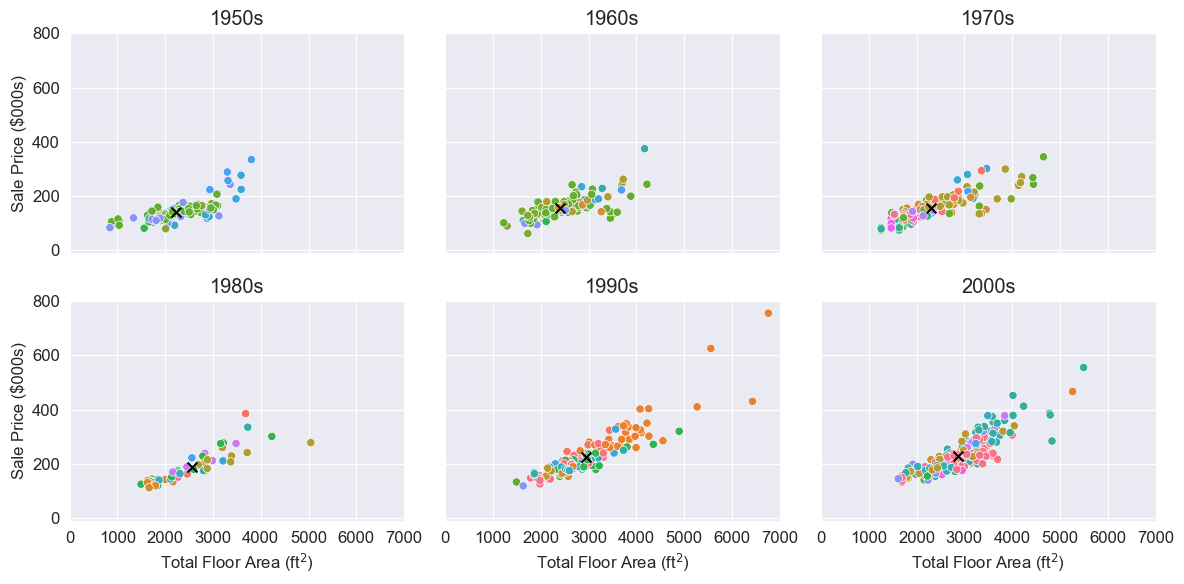

0.3657382183320686


In [18]:
# Plotting scatterplots of price and floor area (as these key features) for each decade with mean plotted as cross and colored
# by neighbourhood - each subplot is for a separate decade
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 6), dpi = 100, sharey = True, sharex = True)

FloorArea_Grouped_Decade = df.groupby('DecadeBuilt')['TotalArea'].mean().sort_index()
FloorArea_Grouped_Decade_List = FloorArea_Grouped_Decade.index.values.tolist()

sns.scatterplot(ax = ax[0,0],
                x = df.loc[df['DecadeBuilt'] == 1950]['TotalArea'],
                y = df['SalePrice']/1000,
                hue = df['Neighborhood'],
                hue_order = df['Neighborhood'].unique(),
                legend = False
               )
ax[0,0].scatter(FloorArea_Grouped_Decade[1950], SalePrice_Grouped_Decade[1950]/1000, s = 50, color = 'black', marker ='x')
ax[0,0].set_xlabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[0,0].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[0,0].set_ylim((-10, 800))
ax[0,0].set_xlim((0, 7000))
ax[0,0].set_xticks(np.arange(0, 8000, 1000))
ax[0,0].set_title('1950s')

sns.scatterplot(ax = ax[0,1], 
                x = df.loc[df['DecadeBuilt'] == 1960]['TotalArea'],
                y = df['SalePrice']/1000,
                hue = df['Neighborhood'],
                legend = False,
                hue_order = df['Neighborhood'].unique()
               )
ax[0,1].scatter(FloorArea_Grouped_Decade[1960], SalePrice_Grouped_Decade[1960]/1000, s = 50, color = 'black', marker ='x')
ax[0,1].set_xlabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[0,1].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[0,1].set_ylim((-10, 800))
ax[0,1].set_xlim((0, 7000))
ax[0,1].set_xticks(np.arange(0, 8000, 1000))
ax[0,1].set_title('1960s')

sns.scatterplot(ax = ax[0,2],
                x = df.loc[df['DecadeBuilt'] == 1970]['TotalArea'],
                y = df['SalePrice']/1000,
                hue = df['Neighborhood'],
                legend = False,
                hue_order = df['Neighborhood'].unique()
               )
ax[0,2].scatter(FloorArea_Grouped_Decade[1970], SalePrice_Grouped_Decade[1970]/1000, s = 50, color = 'black', marker ='x')
ax[0,2].set_xlabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[0,2].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[0,2].set_ylim((-10, 800))
ax[0,2].set_xlim((0, 7000))
ax[0,2].set_xticks(np.arange(0, 8000, 1000))
ax[0,2].set_title('1970s')

sns.scatterplot(ax = ax[1,0],
                x = df.loc[df['DecadeBuilt'] == 1980]['TotalArea'],
                y = df['SalePrice']/1000, 
                hue = df['Neighborhood'],
                legend = False,
                hue_order = df['Neighborhood'].unique()
               )
ax[1,0].scatter(FloorArea_Grouped_Decade[1980], SalePrice_Grouped_Decade[1980]/1000, s = 50, color = 'black', marker ='x')
ax[1,0].set_xlabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[1,0].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[1,0].set_ylim((-10, 800))
ax[1,0].set_xlim((0, 7000))
ax[1,0].set_xticks(np.arange(0, 8000, 1000))
ax[1,0].set_title('1980s')

sns.scatterplot(ax = ax[1,1],
                x = df.loc[df['DecadeBuilt'] == 1990]['TotalArea'],
                y = df['SalePrice']/1000, hue = df['Neighborhood'], 
                legend = False,
                hue_order = df['Neighborhood'].unique()
               )
ax[1,1].scatter(FloorArea_Grouped_Decade[1990], SalePrice_Grouped_Decade[1990]/1000, s = 50, color = 'black', marker ='x')
ax[1,1].set_xlabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[1,1].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[1,1].set_ylim((-10, 800))
ax[1,1].set_xlim((0, 7000))
ax[1,1].set_xticks(np.arange(0, 8000, 1000))
ax[1,1].set_title('1990s')

sns.scatterplot(ax = ax[1,2],
                x = df.loc[df['DecadeBuilt'] == 2000]['TotalArea'],
                y = df['SalePrice']/1000, hue = df['Neighborhood'],
                hue_order = df['Neighborhood'].unique(), 
                legend = False
               )
ax[1,2].scatter(FloorArea_Grouped_Decade[2000], SalePrice_Grouped_Decade[2000]/1000, s = 50, color = 'black', marker ='x')
ax[1,2].set_xlabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[1,2].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[1,2].set_ylim((-10, 800))
ax[1,2].set_xlim((0, 7000))
ax[1,2].set_xticks(np.arange(0, 8000, 1000))
ax[1,2].set_title('2000s')

plt.tight_layout()

plt.show()

# See that both Floor Area and sale price increase with the decades and also that the neighborhood being built change as well

# Correlation between year built post 1950 and floor area - see some +ve correlation, not as strong as price
Post1950_YearBuilt_FloorArea_corr = df['TotalArea'].corr(df.loc[df['Post1950'] == True]['YearBuilt'])
print(Post1950_YearBuilt_FloorArea_corr)

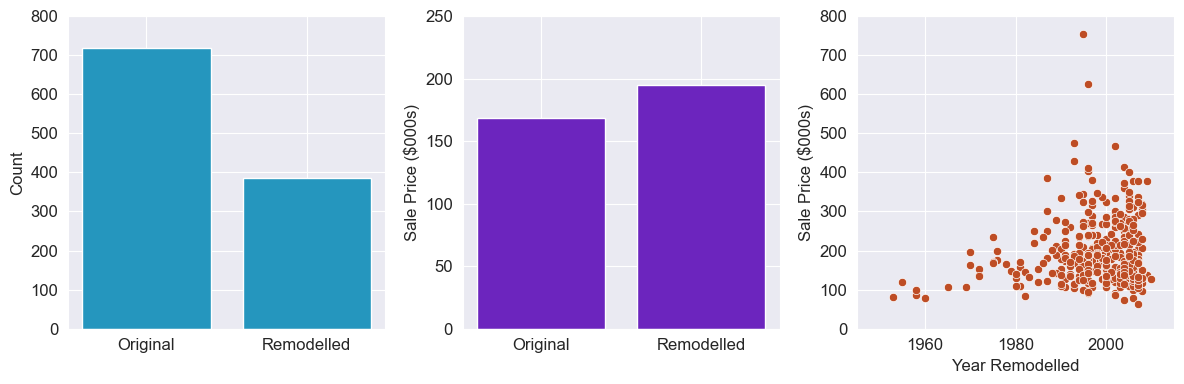

False    718
True     386
Name: Remodelled, dtype: int64
Remodelled
False    168.169851
True     195.203689
Name: SalePrice, dtype: float64
0.1587325790730992


In [19]:
# make field whether remodelled and difference between this and when built, see if being remodelling affects sale price
# and how it changes with how recent the remodelling

# Determine if property remodelled if YearRemod add doesn't equal the year built
df['Remodelled'] = (df['YearRemodAdd'] - df['YearBuilt']) != 0

# Calculating mean sale price by whether remodelled or not
SalePrice_Grouped_Remodelled = df.groupby('Remodelled')['SalePrice'].mean().sort_index()
SalePrice_Grouped_Remodelled_List = SalePrice_Grouped_Remodelled.index.values.tolist()

# Counting occurrences of remodelled or not
Counts_Remodelled = df['Remodelled'].value_counts().sort_index()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4), dpi = 100, sharey = False, sharex = False)

# Plotting how many cases of remodelled or not
ax[0].bar(x = np.arange(1, len(Counts_Remodelled) + 1, 1),
          height = Counts_Remodelled, 
          tick_label = ('Original', 'Remodelled'),
          color = '#2596be') 
ax[0].set_xlabel(None)
ax[0].set_ylabel("Count", fontsize = 12)
ax[0].set_ylim((0,800))

# Average Sale price by whether remodelled or not
ax[1].bar(x = np.arange(1, len(SalePrice_Grouped_Remodelled_List) + 1, 1),
          height = SalePrice_Grouped_Remodelled/1000, 
          tick_label = ('Original', 'Remodelled'),
          color = '#6c25be') 
ax[1].set_xlabel(None)
ax[1].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[1].set_ylim((0,250))

# Scatterplot of sale price versus year remodelled for remodelled properties
sns.scatterplot(ax = ax[2],
                x = df.loc[df['Remodelled'] == True]['YearRemodAdd'],
                y = df['SalePrice']/1000, 
                color = '#be4d25'
               )
ax[2].set_xlabel("Year Remodelled", fontsize = 12)
ax[2].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[2].set_ylim((0, 800))
ax[2].set_xlim((1945, 2015))

plt.tight_layout()

plt.show()

# Correlation between year built post 1950 and floor area - see some +ve correlation, not as strong as price
SalePrice_YearRemod_corr = df['SalePrice'].corr(df.loc[df['Remodelled'] == True]['YearRemodAdd'])


print(Counts_Remodelled)
print(SalePrice_Grouped_Remodelled/1000)
print(SalePrice_YearRemod_corr)

# Perhaps better option is to filter out pre 1950 bulit houses with YearRemodAdd as 1950 as don't know whether these are
# remodelled or not, but we are assuimng they are not and know sale prices increase for houses built after 1950

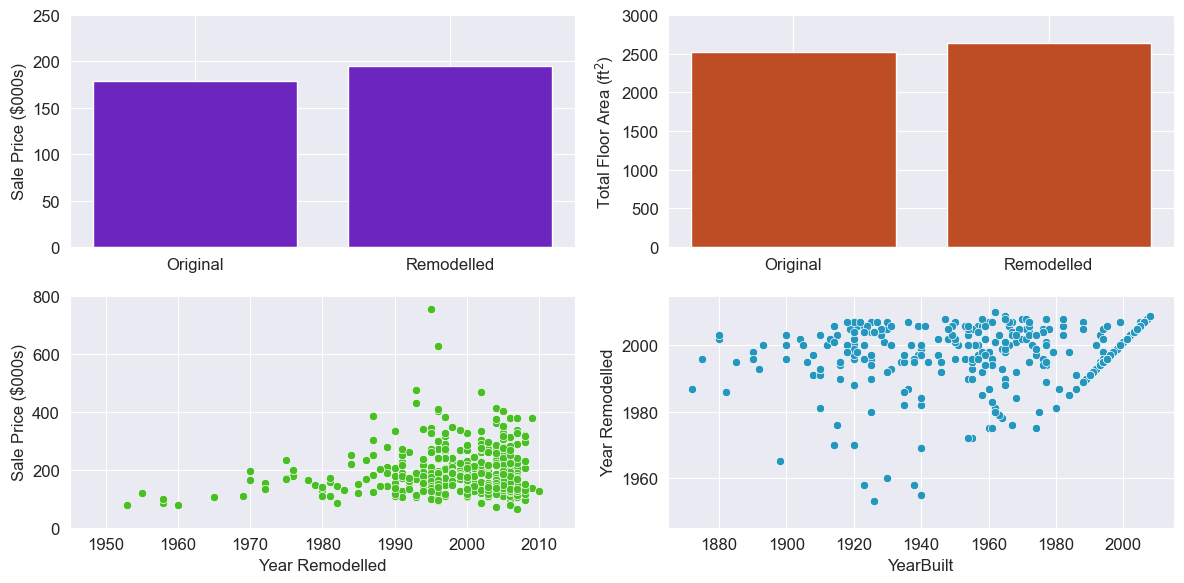

False    586
True     386
Name: Remodelled, dtype: int64
Remodelled
False    178.482280
True     195.203689
Name: SalePrice, dtype: float64
Remodelled
False    2525.933447
True     2640.896373
Name: TotalArea, dtype: float64
0.2582864023005851


In [20]:
# Filtering dataframe to only have properties we know whether they were remodelled or not: ones built post 1950 or ones built
# pre 1950 with a remod after 1950
df_Known_Remod = df.loc[(df['Remodelled'] == True) | (df['YearBuilt'] > 1950)]

# Calculating mean sale price for such properties
KnownRemod_SalePrice_Grouped_Remodelled = df_Known_Remod.groupby('Remodelled')['SalePrice'].mean().sort_index()
KnownRemod_SalePrice_Grouped_Remodelled_List = KnownRemod_SalePrice_Grouped_Remodelled.index.values.tolist()

# Calculating mean floor area for such properties
KnownRemod_TotalArea_Grouped_Remodelled = df_Known_Remod.groupby('Remodelled')['TotalArea'].mean().sort_index()
KnownRemod_TotalArea_Grouped_Remodelled_List = KnownRemod_TotalArea_Grouped_Remodelled.index.values.tolist()

# Calculating counts for each
KnownRemod_Counts_Remodelled = df_Known_Remod['Remodelled'].value_counts().sort_index()

# Repeating above plots but for filtered dataset
# Know correlation with year remod and price remains same as filtering won't removed previous remodelled properties
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 6), dpi = 100, sharey = False, sharex = False)

# Average Sale price by whether remodelled or not
ax[0,0].bar(x = np.arange(1, len(KnownRemod_SalePrice_Grouped_Remodelled_List) + 1, 1),
          height = KnownRemod_SalePrice_Grouped_Remodelled/1000, 
          tick_label = ('Original', 'Remodelled'),
          color = '#6c25be') 
ax[0,0].set_xlabel(None)
ax[0,0].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[0,0].set_ylim((0,250))

# Average Floor Area by whether remodelled or not
ax[0,1].bar(x = np.arange(1, len(KnownRemod_TotalArea_Grouped_Remodelled_List) + 1, 1),
          height = KnownRemod_TotalArea_Grouped_Remodelled, 
          tick_label = ('Original', 'Remodelled'),
          color = '#be4d25') 
ax[0,1].set_xlabel(None)
ax[0,1].set_ylabel("Total Floor Area (ft$^2$)", fontsize = 12)
ax[0,1].set_ylim((0,3000))

# Scatterplot of Year Remodelled vs. price
sns.scatterplot(ax = ax[1,0],
                x = df_Known_Remod.loc[df_Known_Remod['YearRemodAdd'] != df_Known_Remod['YearBuilt']]['YearRemodAdd'],
                y = df_Known_Remod.loc[df_Known_Remod['YearRemodAdd'] != df_Known_Remod['YearBuilt']]['SalePrice']/1000, 
                color = '#49be25'
               )
ax[1,0].set_xlabel("Year Remodelled", fontsize = 12)
ax[1,0].set_ylabel("Sale Price ($000s)", fontsize = 12)
ax[1,0].set_ylim((0, 800))
ax[1,0].set_xlim((1945, 2015))

# Plotting how many cases of remodelled or not
sns.scatterplot(ax = ax[1,1],
                y = df_Known_Remod.loc[df_Known_Remod['YearRemodAdd'] != df_Known_Remod['YearBuilt']]['YearRemodAdd'],
                x = df_Known_Remod.loc[df_Known_Remod['YearRemodAdd'] != df_Known_Remod['YearBuilt']]['YearBuilt'], 
                color = '#2596be'
                )
ax[1,1].set_ylabel("Year Remodelled")
ax[1,1].set_xlabel("YearBuilt", fontsize = 12)
ax[1,1].set_xlim((1865, 2015))
ax[1,1].set_ylim((1945, 2015))

plt.tight_layout()

plt.show()


# Get correlation for year remodelled and price
x = df_Known_Remod.loc[df_Known_Remod['YearRemodAdd'] != df_Known_Remod['YearBuilt']]['YearBuilt']
y = df_Known_Remod.loc[df_Known_Remod['YearRemodAdd'] != df_Known_Remod['YearBuilt']]['YearRemodAdd']

YearRemod_Price_corr = x.corr(y)

# Printing counts, mean sale prices and total areas, and year remodelled to price correlation
print(KnownRemod_Counts_Remodelled)
print(KnownRemod_SalePrice_Grouped_Remodelled/1000)
print(KnownRemod_TotalArea_Grouped_Remodelled)
print(YearRemod_Price_corr)

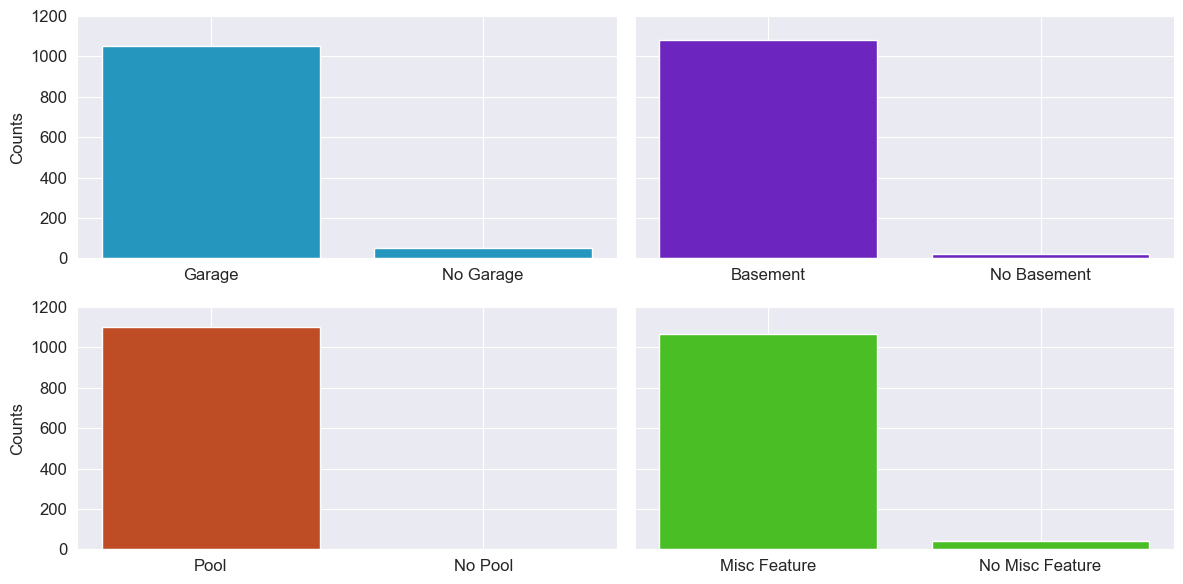

True     1051
False      53
Name: Garage, dtype: int64
True     1081
False      23
Name: Basement, dtype: int64
False    1101
True        3
Name: Pool, dtype: int64
False    1064
True       40
Name: HasMiscFeature, dtype: int64


In [21]:
# Make plots of feature based not suitable to investigate due to large imbalance in small dataset
df['Garage'] = (df['GarageType'] != 'NA')
df['Basement'] = (df['BsmtQual'] != 'NA')
df['Pool'] = (df['PoolQC'] != 'NA')
df['HasMiscFeature'] = (df['MiscFeature'] != 'NA')


# Plotting counts of whether properties have certain features
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 6), dpi = 100, sharey = True, sharex = False)

# Plotting Garage counts
ax[0,0].bar(x = np.arange(0, len(df['Garage'].value_counts()), 1),
            height = df['Garage'].value_counts(),
            tick_label = ('Garage', 'No Garage'),
            color = '#2596be')
ax[0,0].set_ylabel("Counts", fontsize = 12)
ax[0,0].set_ylim(0, 1200)

# Plotting Basement counts
ax[0,1].bar(x = np.arange(0, len(df['Basement'].value_counts()), 1),
            height = df['Basement'].value_counts(),
            tick_label = ('Basement', 'No Basement'),
            color = '#6c25be')
ax[0,1].set_ylim(0, 1200)

# Plotting Pool counts
ax[1,0].bar(x = np.arange(0, len(df['Pool'].value_counts()), 1),
            height = df['Pool'].value_counts(),
            tick_label = ('Pool', 'No Pool'),
            color = '#be4d25')
ax[1,0].set_ylabel("Counts", fontsize = 12)
ax[1,0].set_ylim(0, 1200)

# Plotting 'Misc Feature' counts
ax[1,1].bar(x = np.arange(0, len(df['HasMiscFeature'].value_counts()), 1),
            height = df['HasMiscFeature'].value_counts(),
            tick_label = ('Misc Feature', 'No Misc Feature'),
            color = '#49be25')
ax[1,1].set_ylim(0, 1200)


plt.tight_layout()

plt.show()

# Printing counts of above features
print(df['Garage'].value_counts())
print(df['Basement'].value_counts())
print(df['Pool'].value_counts())
print(df['HasMiscFeature'].value_counts())